In [12]:
import h5py
import os
from mimicplay.scripts.aloha_process.simarUtils import nds


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy


In [13]:
def vis_histograms(file_path):
    # Open the HDF5 file
    with h5py.File(file_path, 'r') as f:
        # Initialize a list to store ee_pose data
        ee_pose_data = []

        # Iterate over all demos
        for demo_key in f['data'].keys():
            demo = f['data'][demo_key]
            ee_pose = demo['obs']['ee_pose'][:]
            ee_pose_data.append(ee_pose)

        # Concatenate all ee_pose data into a single numpy array
        ee_pose_data = np.concatenate(ee_pose_data, axis=0)
        print(ee_pose_data.shape)
        print("mean: ", np.mean(ee_pose_data, axis=0))
        print("median: ", np.median(ee_pose_data, axis=0))

    # Plot histograms for x, y, and z coordinates
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Set the bins range to be centered around zero
    bins_range = (-1, 1)

    axs[0].hist(ee_pose_data[:, 0], bins=50, range=bins_range, color='blue', alpha=0.7)
    axs[0].set_title('Histogram of x coordinate (ee_pose)')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('Frequency')
    axs[0].set_xlim(bins_range)

    axs[1].hist(ee_pose_data[:, 1], bins=50, range=bins_range, color='green', alpha=0.7)
    axs[1].set_title('Histogram of y coordinate (ee_pose)')
    axs[1].set_xlabel('y')
    axs[1].set_ylabel('Frequency')
    axs[1].set_xlim(bins_range)

    axs[2].hist(ee_pose_data[:, 2], bins=50, range=bins_range, color='red', alpha=0.7)
    axs[2].set_title('Histogram of z coordinate (ee_pose)')
    axs[2].set_xlabel('z')
    axs[2].set_ylabel('Frequency')
    axs[2].set_xlim(bins_range)

    plt.tight_layout()
    plt.show()


In [14]:
def load_ee_pose_data(file_path):
    with h5py.File(file_path, 'r') as f:
        ee_pose_data = []
        for demo_key in f['data'].keys():
            demo = f['data'][demo_key]
            ee_pose = demo['obs']['ee_pose'][:]
            ee_pose_data.append(ee_pose)
        return np.concatenate(ee_pose_data, axis=0)

def compute_kl_divergence(data1, data2, bins=50):
    hist1, bin_edges = np.histogram(data1, bins=bins, density=True)
    hist2, _ = np.histogram(data2, bins=bin_edges, density=True)
    
    # Add a small constant to avoid division by zero
    hist1 = hist1 + 1e-10
    hist2 = hist2 + 1e-10
    
    kl_divergence = entropy(hist1, hist2)
    return kl_divergence

def kl_div(file_path_1, file_path_2):

    ee_pose_data_1 = load_ee_pose_data(file_path_1)
    ee_pose_data_2 = load_ee_pose_data(file_path_2)

    # Extract x, y, z coordinates
    x_data_1 = ee_pose_data_1[:, 0]
    x_data_2 = ee_pose_data_2[:, 0]
    y_data_1 = ee_pose_data_1[:, 1]
    y_data_2 = ee_pose_data_2[:, 1]
    z_data_1 = ee_pose_data_1[:, 2]
    z_data_2 = ee_pose_data_2[:, 2]

    # Compute KL divergence for x, y, and z histograms
    kl_div_x = compute_kl_divergence(x_data_1, x_data_2)
    kl_div_y = compute_kl_divergence(y_data_1, y_data_2)
    kl_div_z = compute_kl_divergence(z_data_1, z_data_2)

    # Print results
    print(f"KL Divergence for x coordinate: {kl_div_x}")
    print(f"KL Divergence for y coordinate: {kl_div_y}")
    print(f"KL Divergence for z coordinate: {kl_div_z}")


(4045, 3)
[0.05247263 0.23671394 0.49565537]


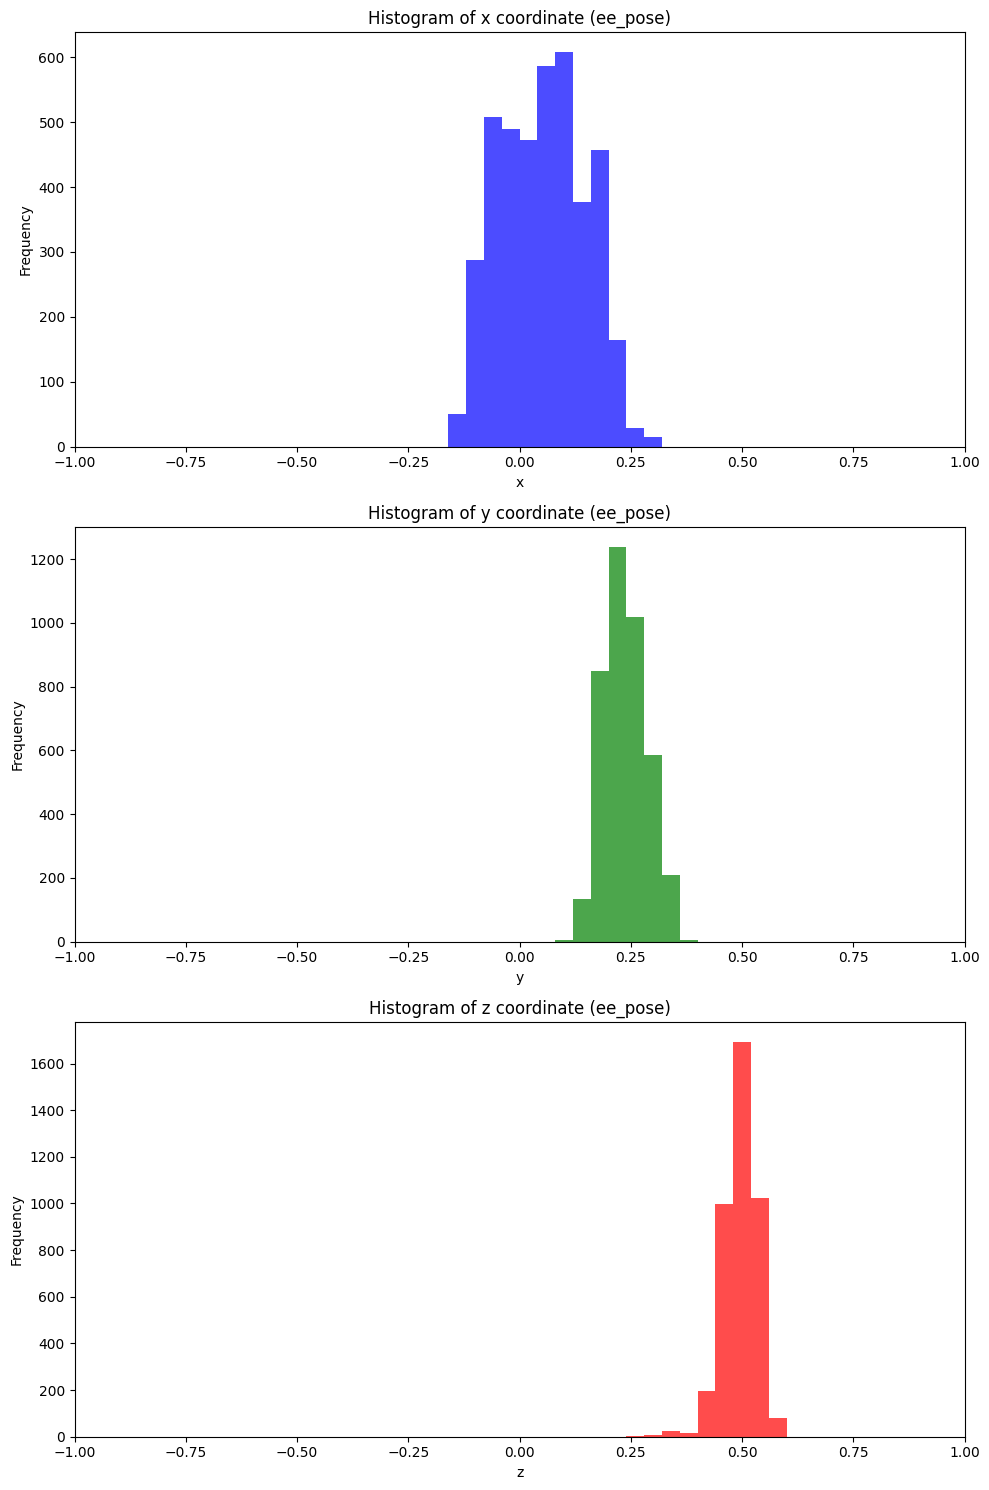

In [7]:
vis_histograms("/coc/flash7/datasets/egoplay/_DEBUG/robot_wearing_aria_oboo_may23/RobotWearingAria/converted/robot_wearing_aria_LH3.hdf5")

(30376, 3)
mean:  [0.12647251 0.27890922 0.51613833]
median:  [0.1210298  0.2807572  0.51880001]


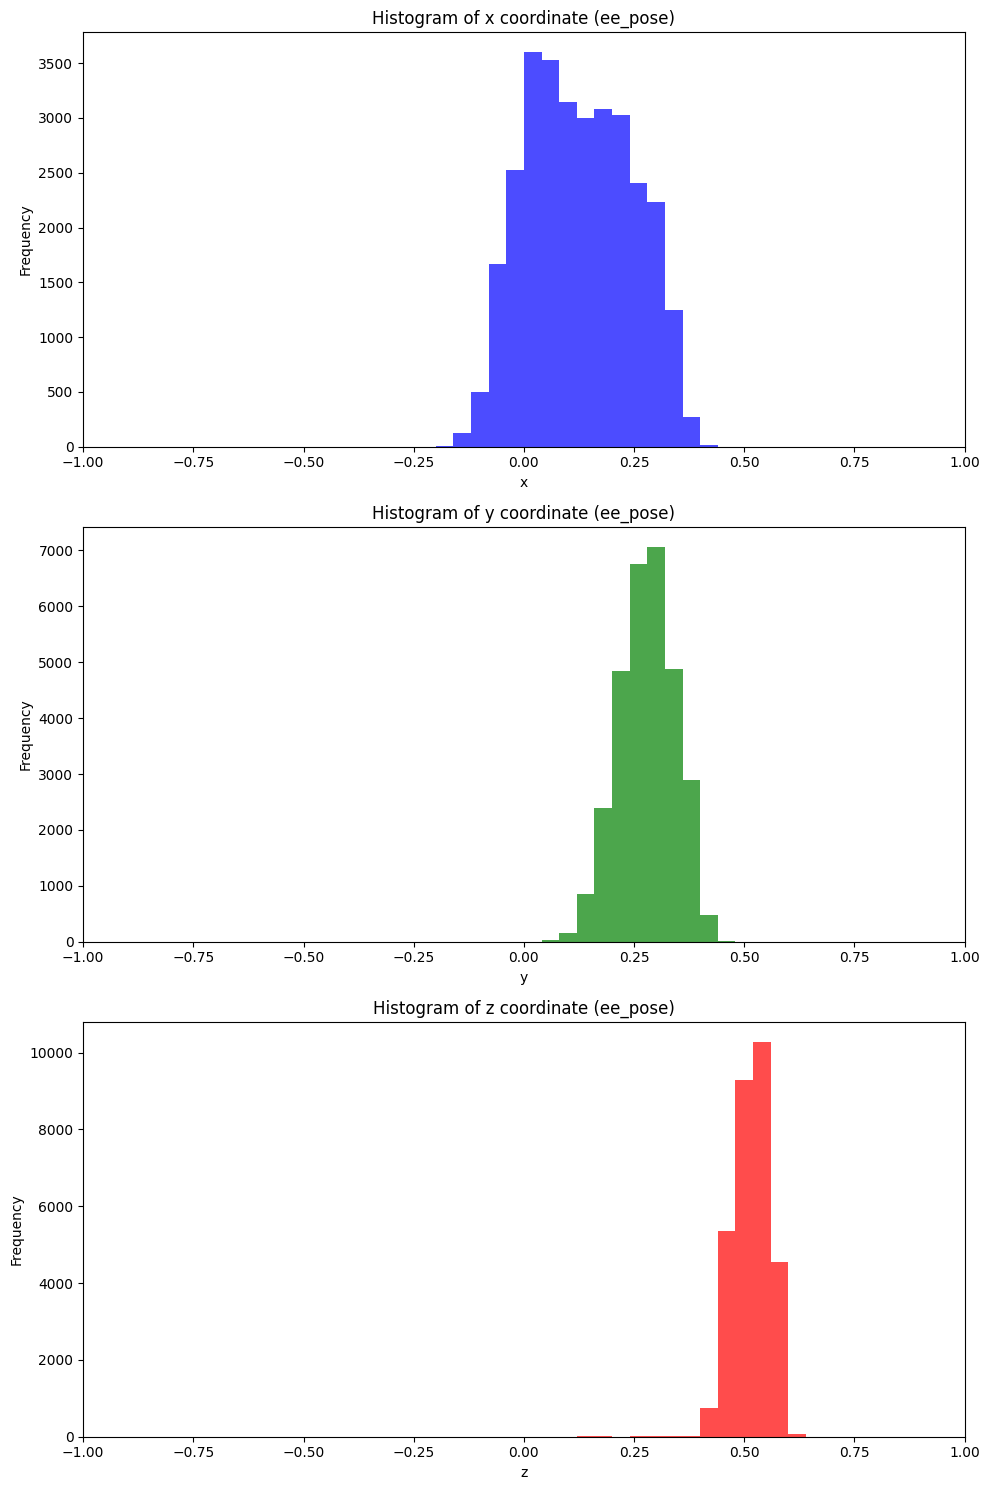

In [15]:
vis_histograms("/coc/flash7/datasets/egoplay/_OBOO_ARIA/oboo_aria_apr11/rawAria/oboo_aria_apr11/converted/oboo_aria_apr11_Mimicplay_LH3.hdf5")

(3959, 3)
mean:  [0.07579874 0.16893981 0.38710509]
median:  [0.06968707 0.2016426  0.37234832]


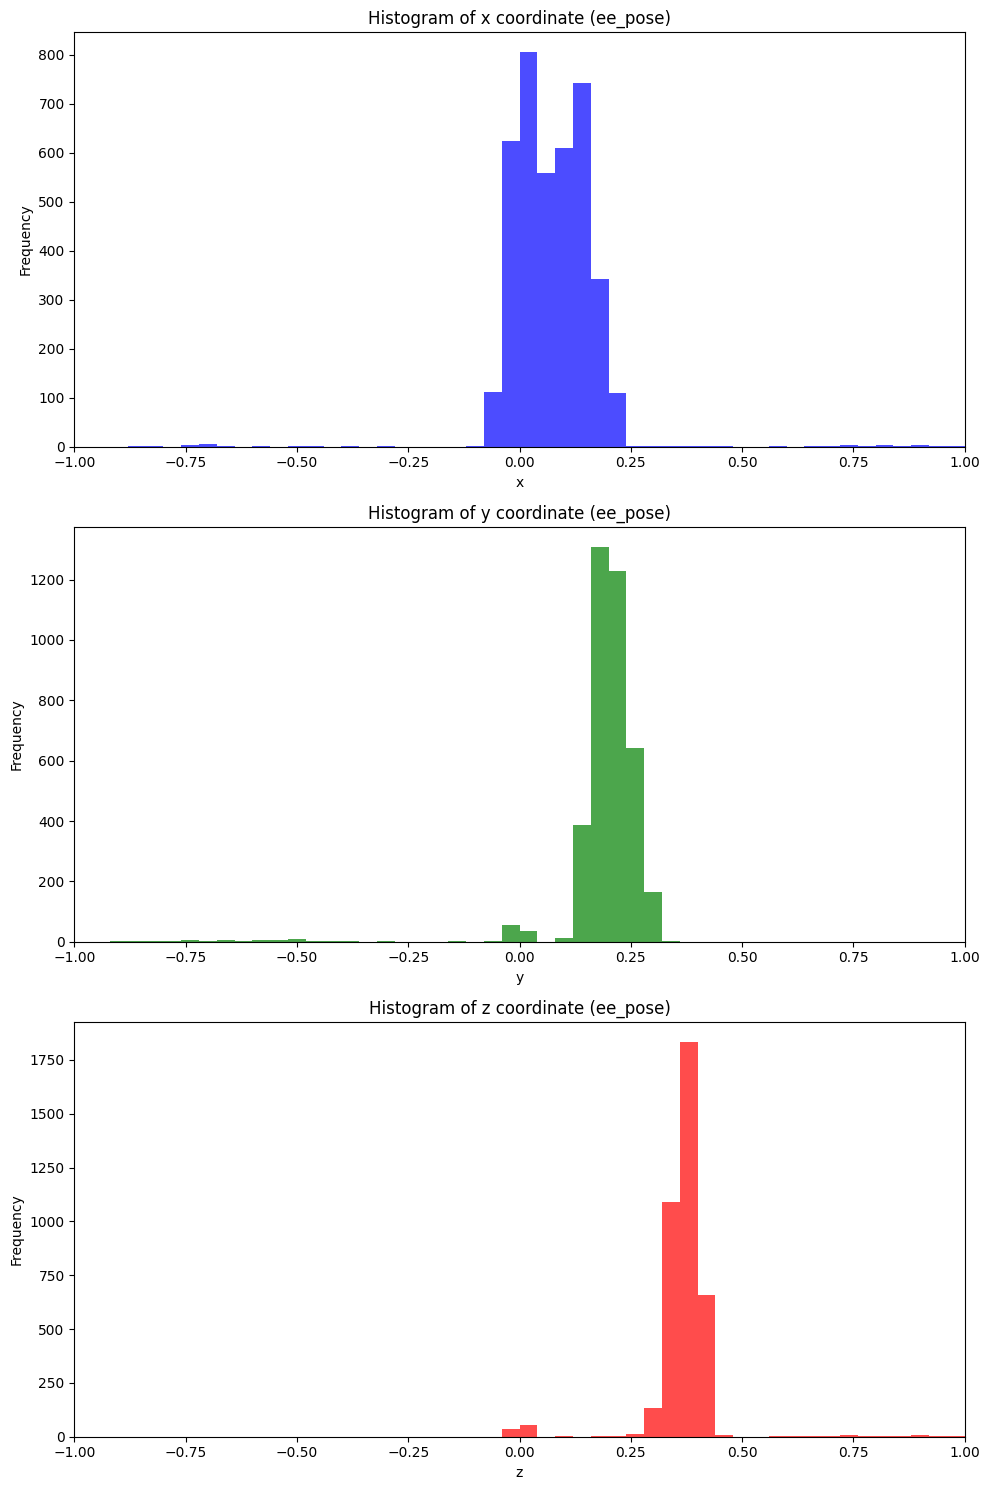

In [16]:
vis_histograms("/coc/flash7/datasets/egoplay/_DEBUG/hand_data_robo_cam_jun3/hand_data_robo_cam_jun3Mimicplay.hdf5")